# Save the Space Humans!

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Aquire

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8492 non-null object
CryoSleep       8476 non-null object
Cabin           8494 non-null object
Destination     8511 non-null object
Age             8514 non-null float64
VIP             8490 non-null object
RoomService     8512 non-null float64
FoodCourt       8510 non-null float64
ShoppingMall    8485 non-null float64
Spa             8510 non-null float64
VRDeck          8505 non-null float64
Name            8493 non-null object
Transported     8693 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


#### Data Dictionary

PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.columns = df.columns.str.lower()

In [644]:
df.describe()

,age,roomservice,foodcourt,shoppingmall,spa,vrdeck,money_spent
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,7785.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791,1484.601541
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2845.288241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,736.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1486.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000


In [7]:
for col in df.columns:
    print(df[col].value_counts())
    print()

8906_01    1
2356_01    1
5466_04    1
5039_02    1
5837_01    1
          ..
1736_01    1
3847_01    1
1168_01    1
4796_01    1
2253_01    1
Name: passengerid, Length: 8693, dtype: int64

Earth     4602
Europa    2131
Mars      1759
Name: homeplanet, dtype: int64

False    5439
True     3037
Name: cryosleep, dtype: int64

G/734/S     8
G/1476/S    7
F/1411/P    7
B/82/S      7
E/13/S      7
           ..
G/524/S     1
B/100/S     1
G/1438/S    1
F/1144/P    1
F/16/S      1
Name: cabin, Length: 6560, dtype: int64

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: destination, dtype: int64

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
75.0      4
79.0      3
78.0      3
77.0      2
76.0      2
Name: age, Length: 80, dtype: int64

False    8291
True      199
Name: vip, dtype: int64

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1230.0       1
987.0        1
930.0        1
3097.0       1
1186.0  

- id is split by group number and number within the group
- there are three departure planets - three, eurpoa, and mars
- some people elected to cryoslept
- how do the cabin numbers correlate to the rest of the stats
- there were three destinations - trappist, canrie, pso 
- most popular ages were late teens, early twenties
- some folks were vip (did they all get cryosleep?)
- the vast majority of folks did not use room service, food court, mall, spa, or vrdeck|

In [8]:
df.columns

Index(['passengerid', 'homeplanet', 'cryosleep', 'cabin', 'destination', 'age',
       'vip', 'roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck',
       'name', 'transported'],
      dtype='object')

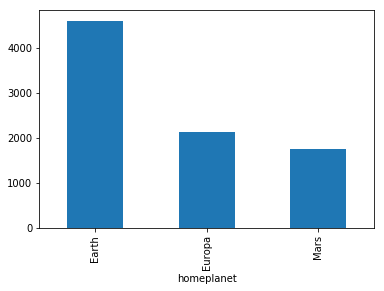

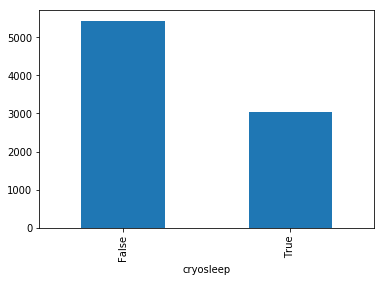

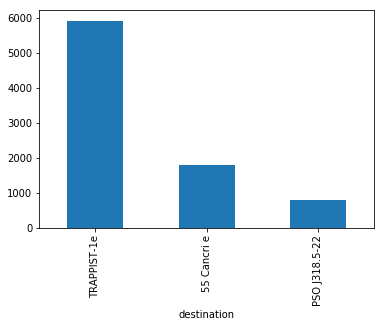

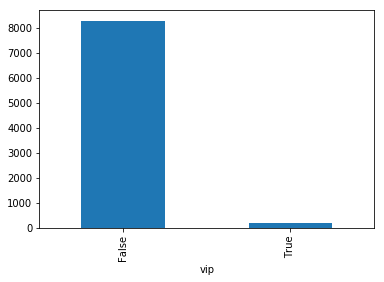

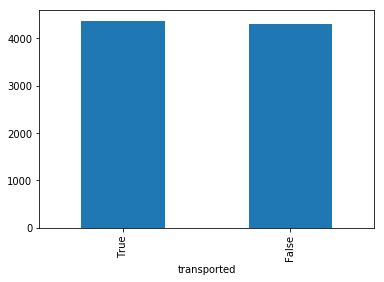

In [9]:
for col in ['homeplanet', 'cryosleep', 'destination', 'vip', 'transported']:
    df[col].value_counts().plot.bar()
    plt.xlabel(col)
    plt.show()

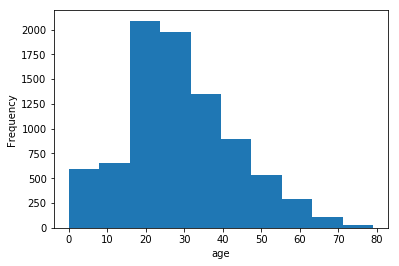

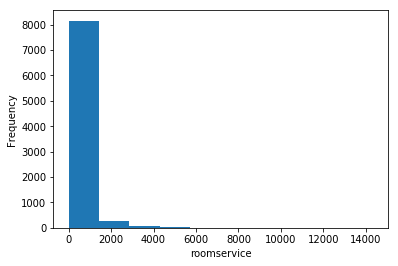

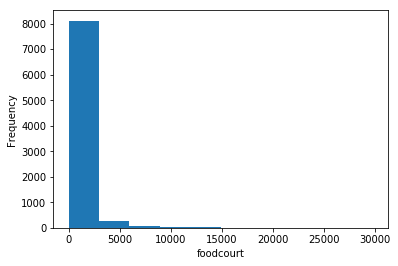

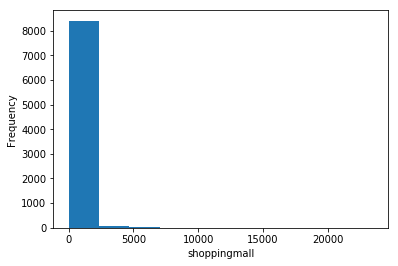

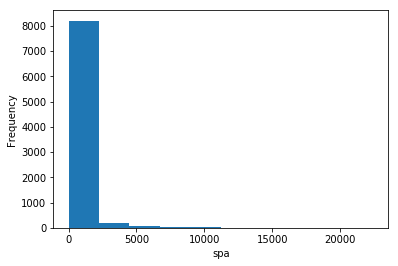

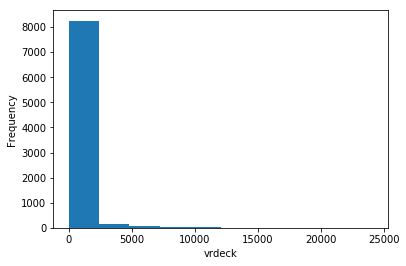

In [10]:
for col in ['age','roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']:
    df[col].plot.hist()
    plt.xlabel(col)
    plt.show()

## Prepare

In [11]:
df

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [12]:
df['passenger_group'] = df.passengerid.str.split('_', expand=True)[0]

In [13]:
df.passenger_group.value_counts().value_counts()

1    4805
2     841
3     340
4     103
5      53
7      33
6      29
8      13
Name: passenger_group, dtype: int64

- Most people traveled in a group of 1

In [14]:
df['cabin_deck'] = df.cabin.str.split('/', expand=True)[0]
df['cabin_number'] = df.cabin.str.split('/', expand=True)[1]
df['cabin_side'] = df.cabin.str.split('/', expand=True)[2]

In [15]:
df.cabin_deck.value_counts(dropna=False).sort_index()

A       256
B       779
C       747
D       478
E       876
F      2794
G      2559
T         5
NaN     199
Name: cabin_deck, dtype: int64

In [16]:
df.cabin_number.astype(float).value_counts(dropna=False).sort_index()

0.0        18
1.0        15
2.0        11
3.0        16
4.0         7
         ... 
1891.0      1
1892.0      1
1893.0      1
1894.0      1
NaN       199
Name: cabin_number, Length: 1818, dtype: int64

In [17]:
df.cabin_side.value_counts(dropna=False)

S      4288
P      4206
NaN     199
Name: cabin_side, dtype: int64

- why do 199 people not have cabin numbers? :(

In [18]:
df.isnull().sum()

passengerid          0
homeplanet         201
cryosleep          217
cabin              199
destination        182
age                179
vip                203
roomservice        181
foodcourt          183
shoppingmall       208
spa                183
vrdeck             188
name               200
transported          0
passenger_group      0
cabin_deck         199
cabin_number       199
cabin_side         199
dtype: int64

In [19]:
for col in df.columns:
    print(f'for column {col}, these are teh respective number of nulls.')
    print(df [df[col].isnull()].isnull().sum())
    print()

for column passengerid, these are teh respective number of nulls.
passengerid        0
homeplanet         0
cryosleep          0
cabin              0
destination        0
age                0
vip                0
roomservice        0
foodcourt          0
shoppingmall       0
spa                0
vrdeck             0
name               0
transported        0
passenger_group    0
cabin_deck         0
cabin_number       0
cabin_side         0
dtype: int64

for column homeplanet, these are teh respective number of nulls.
passengerid          0
homeplanet         201
cryosleep            2
cabin                6
destination          4
age                  2
vip                  3
roomservice          6
foodcourt            2
shoppingmall         7
spa                  3
vrdeck               1
name                 7
transported          0
passenger_group      0
cabin_deck           6
cabin_number         6
cabin_side           6
dtype: int64

for column cryosleep, these are teh respective nu

- there is no obvious null correlation across the board

## Explore

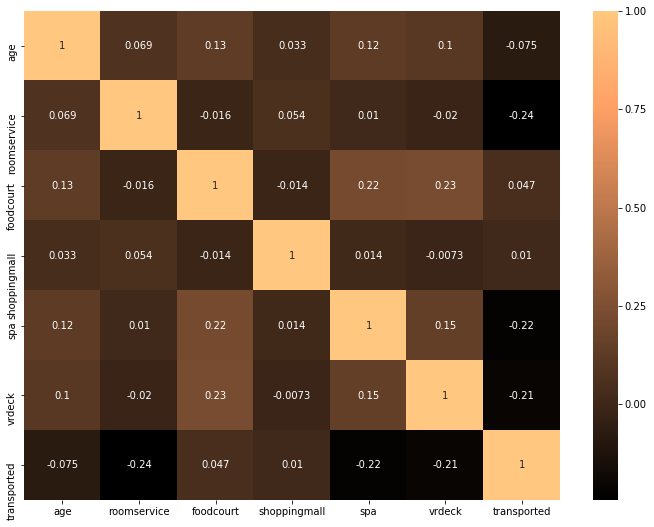

In [20]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, cmap="copper")
plt.show()

- No obvious correlations with folks who were transported

### Let's scope out folks who opted to cryosleep

In [155]:
df.cryosleep.value_counts()

False    5439
True     3037
Name: cryosleep, dtype: int64

In [241]:
round(len(df[df.cryosleep == True]) / len(df.cryosleep.notna())*100, 1)

34.9

^percent of people who opted to cryosleep

In [242]:
pd.crosstab(df.cryosleep, df.transported)

transported,False,True
cryosleep,,
False,3650,1789
True,554,2483


In [245]:
pd.crosstab(df.cryosleep, df.transported, normalize='index')*100

transported,False,True
cryosleep,,
False,67.107924,32.892076
True,18.241686,81.758314


In [158]:
round(len(df [(df.cryosleep == True) & (df.transported == True)]) / len(df [(df.cryosleep == True) ])*100,1)

81.8

- 82% of people who elected to cryosleep were successfully transported
- this seems meaningful, was it related to where their cabin was?

In [247]:
pd.crosstab(df.cryosleep, df.transported, normalize='columns')*100

transported,False,True
cryosleep,,
False,86.822074,41.877341
True,13.177926,58.122659


- however, this only accounts for the 58% of the people who were successfully transported

### Only looking at people who opted to cryosleep

In [248]:
subset = df [df.cryosleep == True]

#### Scope out cabin deck

In [249]:
pd.crosstab(subset.cabin_deck, subset.transported)

transported,False,True
cabin_deck,,
A,4,64
B,3,416
C,2,292
D,1,103
E,59,109
F,8,542
G,460,890


In [250]:
round(pd.crosstab(subset.cabin_deck, subset.transported, normalize='index')*100,1)

transported,False,True
cabin_deck,,
A,5.9,94.1
B,0.7,99.3
C,0.7,99.3
D,1.0,99.0
E,35.1,64.9
F,1.5,98.5
G,34.1,65.9


- What happened in deck E and G? 

#### Scoping out cabin side

In [251]:
pd.crosstab(subset.cabin_side, subset.transported)

transported,False,True
cabin_side,,
P,314,1106
S,223,1310


In [252]:
round(pd.crosstab(subset.cabin_side, subset.transported, normalize='index')*100,1)

transported,False,True
cabin_side,,
P,22.1,77.9
S,14.5,85.5


- The starboard side fared a bit better than the port side 

#### Scoping out both cabin deck and side

In [253]:
table = pd.pivot_table(df, values='passengerid', index='transported', 
               columns=['cabin_deck', 'cabin_side'], aggfunc='count')
table

cabin_deck      A            B             C             D             E  \
cabin_side      P     S      P      S      P      S      P      S      P   
transported                                                                
False        66.0  63.0  115.0   92.0  143.0   96.0  148.0  123.0  282.0   
True         51.0  76.0  238.0  334.0  198.0  310.0  100.0  107.0  147.0   

cabin_deck              F             G           T       
cabin_side       S      P      S      P      S    P    S  
transported                                               
False        281.0  847.0  718.0  704.0  534.0  3.0  1.0  
True         166.0  591.0  638.0  572.0  749.0  1.0  NaN

In [254]:
pd.crosstab([subset.cabin_deck, subset.cabin_side], subset.transported)

transported            False  True 
cabin_deck cabin_side              
A          P               1     28
           S               3     36
B          P               3    181
           S               0    235
C          P               2    128
           S               0    164
D          P               1     45
           S               0     58
E          P              29     46
           S              30     63
F          P               3    276
           S               5    266
G          P             275    402
           S             185    488

In [255]:
round(pd.crosstab([subset.cabin_deck, subset.cabin_side], subset.transported, normalize='index')*100,1)

transported            False  True 
cabin_deck cabin_side              
A          P             3.4   96.6
           S             7.7   92.3
B          P             1.6   98.4
           S             0.0  100.0
C          P             1.5   98.5
           S             0.0  100.0
D          P             2.2   97.8
           S             0.0  100.0
E          P            38.7   61.3
           S            32.3   67.7
F          P             1.1   98.9
           S             1.8   98.2
G          P            40.6   59.4
           S            27.5   72.5

- Something is definitely going on in deck E and G, the port side is a little more vunerable than the star side
- I wish I had a picture of this ship! 

### Looking at all deck cabins and transported status, regardless of cryosleep status

In [256]:
df.cabin_deck.value_counts().sort_index()

A     256
B     779
C     747
D     478
E     876
F    2794
G    2559
T       5
Name: cabin_deck, dtype: int64

In [257]:
pd.crosstab(df.cabin_deck, df.transported)

transported,False,True
cabin_deck,,
A,129,127
B,207,572
C,239,508
D,271,207
E,563,313
F,1565,1229
G,1238,1321
T,4,1


In [258]:
round(pd.crosstab(df.cabin_deck, df.transported, normalize='index')*100,1)

transported,False,True
cabin_deck,,
A,50.4,49.6
B,26.6,73.4
C,32.0,68.0
D,56.7,43.3
E,64.3,35.7
F,56.0,44.0
G,48.4,51.6
T,80.0,20.0


- much less consistency seen here

In [259]:
pd.crosstab(df.cabin_side, df.transported)

transported,False,True
cabin_side,,
P,2308,1898
S,1908,2380


In [260]:
round(pd.crosstab(df.cabin_side, df.transported, normalize='index')*100,1)

transported,False,True
cabin_side,,
P,54.9,45.1
S,44.5,55.5


- cabin side doesnt seem to matter here

In [261]:
round(pd.crosstab([df.cryosleep, df.cabin_deck], df.transported, normalize='index')*100,1)

transported           False  True 
cryosleep cabin_deck              
False     A            67.6   32.4
          B            57.8   42.2
          C            53.7   46.3
          D            72.3   27.7
          E            71.4   28.6
          F            69.8   30.2
          G            64.9   35.1
          T            75.0   25.0
True      A             5.9   94.1
          B             0.7   99.3
          C             0.7   99.3
          D             1.0   99.0
          E            35.1   64.9
          F             1.5   98.5
          G            34.1   65.9

- people who didn't cryosleep most definitely fared the worst

In [262]:
round(pd.crosstab([df.cryosleep, df.cabin_deck], df.transported, normalize='all')*100,1)

transported           False  True 
cryosleep cabin_deck              
False     A             1.5    0.7
          B             2.4    1.7
          C             2.8    2.4
          D             3.2    1.2
          E             5.9    2.4
          F            18.3    7.9
          G             9.0    4.9
          T             0.0    0.0
True      A             0.0    0.8
          B             0.0    5.0
          C             0.0    3.5
          D             0.0    1.2
          E             0.7    1.3
          F             0.1    6.5
          G             5.6   10.7

- Deck G is one of the more unreliable spots, but it was also one of the most weighted in terms of people

### What about VIP status?

In [263]:
df.vip.value_counts()

False    8291
True      199
Name: vip, dtype: int64

- minimal vip peeps

#### Which got transported?

In [264]:
pd.crosstab(df.vip, df.transported)

transported,False,True
vip,,
False,4093,4198
True,123,76


In [265]:
round(pd.crosstab(df.vip, df.transported, normalize='index')*100,1)

transported,False,True
vip,,
False,49.4,50.6
True,61.8,38.2


- ohhh! being VIP didn't help them!!!

#### did VIP affect where they slept?

In [266]:
pd.crosstab(df.vip, df.cabin_deck)

cabin_deck,A,B,C,D,E,F,G,T
vip,,,,,,,,
False,215,725,687,438,846,2695,2493,5
True,35,42,41,31,15,29,0,0


In [267]:
pd.crosstab(df.vip, df.cabin_side)

cabin_side,P,S
vip,,
False,4011,4093
True,102,91


- VIPs were scattered throughout the ship

#### Did vips spend the most money? probably not relevant to transported status

In [268]:
subset = df [df.vip == True]

In [269]:
pd.crosstab(df.vip, df.cabin_side)

cabin_side,P,S
vip,,
False,4011,4093
True,102,91


In [270]:
for col in ['roomservice', 'foodcourt', 'shoppingmall', 'spa', 'vrdeck']:
    print(subset[col].value_counts(bins=15))
    print()

(-8.244, 549.533]       148
(549.533, 1099.067]      21
(1099.067, 1648.6]        9
(1648.6, 2198.133]        6
(2198.133, 2747.667]      5
(7693.467, 8243.0]        2
(2747.667, 3297.2]        2
(4945.8, 5495.333]        1
(3846.733, 4396.267]      1
(7143.933, 7693.467]      0
(6594.4, 7143.933]        0
(6044.867, 6594.4]        0
(5495.333, 6044.867]      0
(4396.267, 4945.8]        0
(3297.2, 3846.733]        0
Name: roomservice, dtype: int64

(-29.814, 1987.533]       142
(1987.533, 3975.067]       23
(3975.067, 5962.6]         12
(5962.6, 7950.133]          7
(7950.133, 9937.667]        3
(9937.667, 11925.2]         2
(27825.467, 29813.0]        1
(25837.933, 27825.467]      1
(13912.733, 15900.267]      1
(11925.2, 13912.733]        1
(23850.4, 25837.933]        0
(21862.867, 23850.4]        0
(19875.333, 21862.867]      0
(17887.8, 19875.333]        0
(15900.267, 17887.8]        0
Name: foodcourt, dtype: int64

(-3.701, 246.667]       153
(246.667, 493.333]        9
(493.333, 

- Meh.

#### did vips cryosleep?

In [271]:
pd.crosstab(df.vip, df.cryosleep)

cryosleep,False,True
vip,,
False,5143,2941
True,175,21


In [272]:
pd.crosstab(df.vip, [df.cryosleep, df.transported])

cryosleep   False       True       
transported False True  False True 
vip                                
False        3455  1688   535  2406
True          121    54     0    21

- all the vips that DID cryosleep were transported, tho there were very few of them


### Does homeplanet relate to where they slept?

In [273]:
pd.crosstab(df.homeplanet, df.cabin_deck)

cabin_deck,A,B,C,D,E,F,G,T
homeplanet,,,,,,,,
Earth,0,0,0,0,395,1614,2498,0
Europa,252,766,734,186,128,0,0,4
Mars,0,0,0,282,330,1110,0,0


In [274]:
round(pd.crosstab(df.homeplanet, df.cabin_deck, normalize='columns')*100, 1)

cabin_deck,A,B,C,D,E,F,G,T
homeplanet,,,,,,,,
Earth,0.0,0.0,0.0,0.0,46.3,59.3,100.0,0.0
Europa,100.0,100.0,100.0,39.7,15.0,0.0,0.0,100.0
Mars,0.0,0.0,0.0,60.3,38.7,40.7,0.0,0.0


- Decks A, B, & C comprised only of Europa folks
- Deck D comprised of Europa & Mars folks
- Deck E comprised of Earth, Europa, & Mars
- Deck F comprised of Earth & Mars
- Deck G comprised of only Earth folks
- Deck T comprised only of Europa folks, but there were only 4 of them 

In [275]:
pd.crosstab(df.homeplanet, df.cabin_side)

cabin_side,P,S
homeplanet,,
Earth,2270,2237
Europa,955,1115
Mars,888,834


- Did not affect cabin side

In [276]:
pd.crosstab([df.homeplanet, df.cryosleep], df.transported)

transported           False  True 
homeplanet cryosleep              
Earth      False       2109    997
           True         475    907
Europa     False        697    465
           True          10    901
Mars       False        757    290
           True          59    610

In [277]:
round(pd.crosstab([df.homeplanet, df.cryosleep], df.transported, normalize='index')*100, 1)

transported           False  True 
homeplanet cryosleep              
Earth      False       67.9   32.1
           True        34.4   65.6
Europa     False       60.0   40.0
           True         1.1   98.9
Mars       False       72.3   27.7
           True         8.8   91.2

- folks from europa and mars who elected to cryosleep had the highest percentage of getting transported
- was it because they werent in cabins E and G? 

In [278]:
round(pd.crosstab([df.homeplanet, df.cryosleep, df.cabin_deck], df.transported, normalize='index')*100, 1)

transported                      False  True 
homeplanet cryosleep cabin_deck              
Earth      False     E            63.4   36.6
                     F            71.2   28.8
                     G            64.5   35.5
           True      E            38.5   61.5
                     F            27.3   72.7
                     G            34.2   65.8
Europa     False     A            67.2   32.8
                     B            57.7   42.3
                     C            53.9   46.1
                     D            65.8   34.2
                     E            75.3   24.7
                     T            66.7   33.3
           True      A             6.1   93.9
                     B             0.7   99.3
                     C             0.7   99.3
                     D             0.0  100.0
                     E             2.0   98.0
Mars       False     D            75.0   25.0
                     E            82.7   17.3
                     F            66.4   33.6
           True      D             3.0   97.0
                     E            53.5   46.5
                     F             0.8   99.2

### What can we learn about the destintation planet?

In [286]:
df.destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: destination, dtype: int64

- trappist is the most popular destination
- trappist is 39.46 light years from earth 
- cancrie is 40 light years from earth
- pso is 80 light years from earth


#### destination and home planet

In [289]:
pd.crosstab(df.homeplanet, df.destination)

destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
homeplanet,,,
Earth,690,712,3101
Europa,886,19,1189
Mars,193,49,1475


In [291]:
round(pd.crosstab(df.homeplanet, df.destination, normalize='index')*100, 1)

destination,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
homeplanet,,,
Earth,15.3,15.8,68.9
Europa,42.3,0.9,56.8
Mars,11.2,2.9,85.9


- peeps from all planets want to go to trappist the most! - it is the closest

#### destination and cabin

In [292]:
pd.crosstab(df.destination, df.cabin_deck)

cabin_deck,A,B,C,D,E,F,G,T
destination,,,,,,,,
55 Cancri e,108,333,317,113,116,398,365,0
PSO J318.5-22,2,3,13,17,41,241,461,0
TRAPPIST-1e,142,426,405,338,696,2088,1688,5


#### destination, homeplanet and transported

In [301]:
pd.crosstab([df.homeplanet, df.destination], df.cabin_deck)

cabin_deck                  A    B    C    D    E     F     G  T
homeplanet destination                                          
Earth      55 Cancri e      0    0    0    0   46   271   359  0
           PSO J318.5-22    0    0    0    0   28   217   451  0
           TRAPPIST-1e      0    0    0    0  305  1087  1646  0
Europa     55 Cancri e    106  328  313   62   45     0     0  0
           PSO J318.5-22    2    3   13    0    0     0     0  0
           TRAPPIST-1e    140  418  396  123   80     0     0  4
Mars       55 Cancri e      0    0    0   47   21   123     0  0
           PSO J318.5-22    0    0    0   16   12    20     0  0
           TRAPPIST-1e      0    0    0  210  293   940     0  0

In [302]:
round(pd.crosstab([df.homeplanet, df.destination], df.cabin_deck, normalize='index')*100,1)

cabin_deck                   A     B     C     D     E     F     G    T
homeplanet destination                                                 
Earth      55 Cancri e     0.0   0.0   0.0   0.0   6.8  40.1  53.1  0.0
           PSO J318.5-22   0.0   0.0   0.0   0.0   4.0  31.2  64.8  0.0
           TRAPPIST-1e     0.0   0.0   0.0   0.0  10.0  35.8  54.2  0.0
Europa     55 Cancri e    12.4  38.4  36.7   7.3   5.3   0.0   0.0  0.0
           PSO J318.5-22  11.1  16.7  72.2   0.0   0.0   0.0   0.0  0.0
           TRAPPIST-1e    12.1  36.0  34.1  10.6   6.9   0.0   0.0  0.3
Mars       55 Cancri e     0.0   0.0   0.0  24.6  11.0  64.4   0.0  0.0
           PSO J318.5-22   0.0   0.0   0.0  33.3  25.0  41.7   0.0  0.0
           TRAPPIST-1e     0.0   0.0   0.0  14.6  20.3  65.1   0.0  0.0

In [306]:
round(pd.crosstab([df.homeplanet, df.destination], df.cabin_deck, normalize='columns')*100,1)

cabin_deck                   A     B     C     D     E     F     G      T
homeplanet destination                                                   
Earth      55 Cancri e     0.0   0.0   0.0   0.0   5.5  10.2  14.6    0.0
           PSO J318.5-22   0.0   0.0   0.0   0.0   3.4   8.2  18.4    0.0
           TRAPPIST-1e     0.0   0.0   0.0   0.0  36.7  40.9  67.0    0.0
Europa     55 Cancri e    42.7  43.8  43.4  13.5   5.4   0.0   0.0    0.0
           PSO J318.5-22   0.8   0.4   1.8   0.0   0.0   0.0   0.0    0.0
           TRAPPIST-1e    56.5  55.8  54.8  26.9   9.6   0.0   0.0  100.0
Mars       55 Cancri e     0.0   0.0   0.0  10.3   2.5   4.6   0.0    0.0
           PSO J318.5-22   0.0   0.0   0.0   3.5   1.4   0.8   0.0    0.0
           TRAPPIST-1e     0.0   0.0   0.0  45.9  35.3  35.4   0.0    0.0

In [307]:
round(pd.crosstab([df.homeplanet, df.destination], df.cabin_side, normalize='index')*100,1)

cabin_side                   P     S
homeplanet destination              
Earth      55 Cancri e    47.9  52.1
           PSO J318.5-22  50.6  49.4
           TRAPPIST-1e    50.9  49.1
Europa     55 Cancri e    47.3  52.7
           PSO J318.5-22  44.4  55.6
           TRAPPIST-1e    44.8  55.2
Mars       55 Cancri e    53.4  46.6
           PSO J318.5-22  58.3  41.7
           TRAPPIST-1e    51.6  48.4

#### destination and transported

In [308]:
pd.crosstab(df.destination, df.transported)

transported,False,True
destination,,
55 Cancri e,702,1098
PSO J318.5-22,395,401
TRAPPIST-1e,3128,2787


In [309]:
pd.crosstab([df.destination, df.cabin_deck], df.transported)

transported               False  True 
destination   cabin_deck              
55 Cancri e   A              50     58
              B              79    254
              C              97    220
              D              44     69
              E              49     67
              F             230    168
              G             135    230
PSO J318.5-22 A               0      2
              B               1      2
              C               3     10
              D              11      6
              E              14     27
              F             173     68
              G             180    281
TRAPPIST-1e   A              77     65
              B             121    305
              C             137    268
              D             210    128
              E             486    210
              F            1129    959
              G             899    789
              T               4      1

In [310]:
round(pd.crosstab([df.destination, df.cabin_deck], df.transported, normalize='index')*100, 1)

transported               False  True 
destination   cabin_deck              
55 Cancri e   A            46.3   53.7
              B            23.7   76.3
              C            30.6   69.4
              D            38.9   61.1
              E            42.2   57.8
              F            57.8   42.2
              G            37.0   63.0
PSO J318.5-22 A             0.0  100.0
              B            33.3   66.7
              C            23.1   76.9
              D            64.7   35.3
              E            34.1   65.9
              F            71.8   28.2
              G            39.0   61.0
TRAPPIST-1e   A            54.2   45.8
              B            28.4   71.6
              C            33.8   66.2
              D            62.1   37.9
              E            69.8   30.2
              F            54.1   45.9
              G            53.3   46.7
              T            80.0   20.0

### What about age?

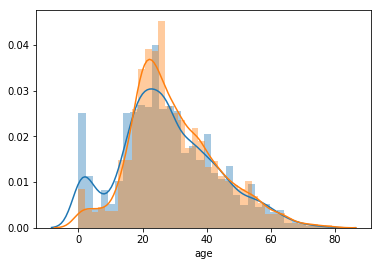

In [343]:
sns.distplot(df[(df.age.notna()) & (df.transported==True)].age)
sns.distplot(df[(df.age.notna()) & (df.transported==False)].age)
plt.show()

### How does money spent correlate? Surely no cryosleeping people spend money

In [345]:
df['money_spent'] = df.roomservice + df.foodcourt + df.shoppingmall + df.spa + df.vrdeck

In [355]:
df.money_spent.value_counts(dropna=False)

0.0        3247
NaN         908
809.0        50
788.0        39
804.0        36
           ... 
17708.0       1
1615.0        1
1026.0        1
837.0         1
989.0         1
Name: money_spent, Length: 2117, dtype: int64

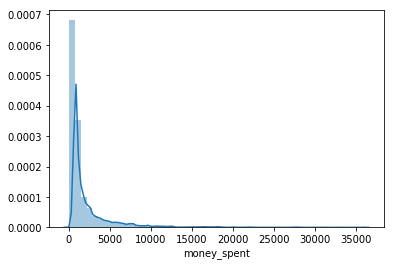

In [366]:
sns.distplot(df.money_spent [df.money_spent.notna()])
plt.show()

In [367]:
df [(df.cryosleep == True)].money_spent.value_counts(dropna=False)

0.0    2690
NaN     347
Name: money_spent, dtype: int64

- Good, as expected

In [368]:
df [(df.cryosleep == False)].money_spent.value_counts(dropna=False)

NaN        537
0.0        470
809.0       50
788.0       38
804.0       36
          ... 
2033.0       1
1563.0       1
4445.0       1
16771.0      1
5110.0       1
Name: money_spent, Length: 2084, dtype: int64

In [369]:
df [(df.cryosleep == False)].money_spent.value_counts(dropna=False).sort_index()

0.0        470
336.0        1
394.0        2
395.0        1
397.0        1
          ... 
30478.0      1
31074.0      1
31076.0      1
35987.0      1
NaN        537
Name: money_spent, Length: 2084, dtype: int64

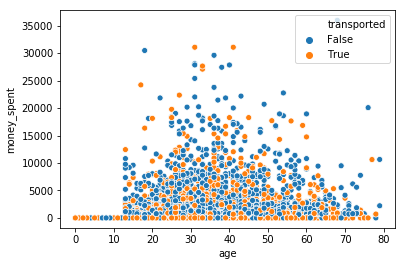

In [375]:
sns.scatterplot(data=df, x="age",y="money_spent", hue="transported")
plt.show()

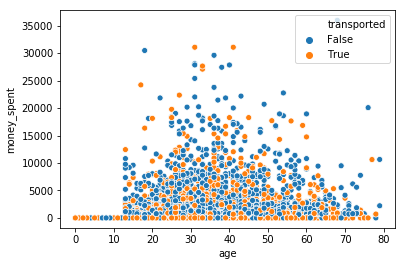

In [382]:
sns.scatterplot(data=df, x="age",y="money_spent", hue="transported")
plt.show()

In [383]:
subset = df [df.cryosleep == False]

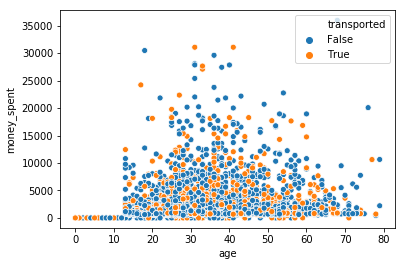

In [384]:
sns.scatterplot(data=subset, x="age",y="money_spent", hue="transported")
plt.show()

### Of the people who didn't cryosleep, which ones were transportted

In [393]:
pd.crosstab(subset.cabin_side, subset.transported)

transported,False,True
cabin_side,,
P,1924,749
S,1647,1011


In [394]:
pd.crosstab(subset.cabin_deck, subset.transported)

transported,False,True
cabin_deck,,
A,123,59
B,197,144
C,231,199
D,263,101
E,491,197
F,1519,657
G,744,402
T,3,1


In [397]:
pd.crosstab(subset.age [subset.age<20], subset.transported)

transported,False,True
age,,
0.0,19,85
1.0,6,17
2.0,9,17
3.0,6,21
4.0,11,23
5.0,2,8
6.0,9,14
7.0,10,17
8.0,13,18


## Model

In [460]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, classification_report

### Model 1 - cryosleep only & decision tree

In [668]:
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,passenger_group,cabin_deck,cabin_number,cabin_side,money_spent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S,1091.0


In [671]:
df1 = df [df.cryosleep.notna()]

In [672]:
x_train = df1[['cryosleep']]
y_train = df1.transported

In [676]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.7235724398301085

### Model 2 - cyrosleep, cabin, homeplanet & decision tree

In [587]:
df.head()

,passengerid,homeplanet,cryosleep,cabin,destination,age,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,passenger_group,cabin_deck,cabin_number,cabin_side,money_spent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,B,0,P,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,F,0,S,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,A,0,S,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,A,0,S,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,F,1,S,1091.0


In [645]:
df2 = df[['cryosleep','cabin_deck', 'homeplanet','transported']]

In [646]:
df2 = df2.dropna()

In [658]:
x_train = df2[['cryosleep','cabin_deck']]
y_train = df2.transported

In [659]:
int_encoder = LabelEncoder()
x_train.cabin_deck = int_encoder.fit_transform(x_train.cabin_deck)
# x_train.homeplanet = int_encoder.fit_transform(x_train.homeplanet)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [660]:
x_train

,cryosleep,cabin_deck
0,False,1
1,False,5
2,False,0
3,False,0
4,False,5
...,...,...
8688,False,0
8689,True,6
8690,False,6
8691,False,4


In [667]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.7216660486960821

### Model 3 - cyrosleep, cabin, homeplanet & random forest tree

In [665]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
                            min_samples_leaf=3, n_estimators=100, max_depth=3,random_state=123)

rf.fit(x_train, y_train)
rf.score(x_train, y_train)

0.7216660486960821

### Model 4 - cyrosleep, cabin, homeplanet & knn

In [666]:
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform')

knn.fit(x_train, y_train)
knn.score(x_train, y_train)

0.7162279075516006

## Final Model Test

In [601]:
test = pd.read_csv('test.csv')

In [602]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [611]:
x_train = df1[['cryosleep']]
y_train = df1[['transported']]

clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [623]:
x_test = test[['CryoSleep']]

In [624]:
x_test

,CryoSleep
0,True
1,False
2,True
3,False
4,False
...,...
4272,True
4273,False
4274,True
4275,False


In [627]:
x_test = pd.DataFrame(x_test['CryoSleep'].fillna(False))

In [628]:
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)

In [631]:
y_pred

array([ True, False,  True, ...,  True, False,  True])

In [634]:
pd.Series(y_pred, name='Transported')

0        True
1       False
2        True
3       False
4       False
        ...  
4272     True
4273    False
4274     True
4275    False
4276     True
Name: Transported, Length: 4277, dtype: bool

In [639]:
final = pd.concat([test,(pd.Series(y_pred, name='Transported'))], axis=1)

In [643]:
final[['PassengerId','Transported']].to_csv('space_titanic_submit1.csv',index=False)